In [48]:
import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import *         
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection
from keras.optimizers import Adam
opt = Adam(lr=0.001)

In [49]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (150, 150)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

In [50]:
dataset = '/home/ragu/DATASETS/TEMP/'
images, labels, class_names = load_data(dataset)

Loading Dataset /home/ragu/DATASETS/TEMP/


100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 34.98it/s]


In [51]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [52]:
images = images/255.0

In [53]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [54]:
RRNET8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

RRNET8.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history_RRNET8 = RRNET8.fit(train_images, train_labels, batch_size=128, epochs = 50, validation_split = 0.2)

RRNET8_evaluate = RRNET8.evaluate(test_images, test_labels)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 3.4043 - accuracy: 0.0000e+00 - val_loss: 3.1011 - val_accuracy: 0.1667
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 3.0619 - accuracy: 0.3182 - val_loss: 2.4108 - val_accuracy: 0.1667
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 2.2265 - accuracy: 0.3182 - val_loss: 2.5351 - val_accuracy: 0.1667
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 1.9918 - accuracy: 0.3182 - val_loss: 2.2404 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 1.7651 - accuracy: 0.3182 - val_loss: 1.6820 - val_accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 1.4134 - accuracy: 0.3182 - val_loss: 1.4956 - val_accuracy: 0.1667
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 1.3832 - accuracy: 0.1818 - val_loss: 1.4408 - val_accuracy: 0.1667
Epoch 8/50
1/1 [=====================

In [55]:
AlexNet = tf.keras.Sequential()
AlexNet.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(150, 150, 3)))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
AlexNet.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
AlexNet.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
AlexNet.add(tf.keras.layers.BatchNormalization())
AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
AlexNet.add(tf.keras.layers.Flatten())
AlexNet.add(tf.keras.layers.Dense(4096, activation="relu"))
AlexNet.add(tf.keras.layers.Dropout(0.5))
AlexNet.add(tf.keras.layers.Dense(10, activation="softmax"))

AlexNet.compile(loss='sparse_categorical_crossentropy', optimizer= opt,  metrics=['accuracy'])

history_AlexNet = AlexNet.fit(train_images, train_labels, batch_size=128, epochs = 50, validation_split = 0.2)

AlexNet_evaluate = AlexNet.evaluate(test_images, test_labels)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 3.6827 - accuracy: 0.1818 - val_loss: 1.6355 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 0s 433ms/step - loss: 6.9120 - accuracy: 0.4091 - val_loss: 2.4576 - val_accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 0s 438ms/step - loss: 24.3412 - accuracy: 0.2273 - val_loss: 7.8095 - val_accuracy: 0.1667
Epoch 4/50
1/1 [==============================] - 0s 440ms/step - loss: 18.1213 - accuracy: 0.4091 - val_loss: 20.4497 - val_accuracy: 0.1667
Epoch 5/50
1/1 [==============================] - 0s 446ms/step - loss: 2.8671 - accuracy: 0.8182 - val_loss: 28.8983 - val_accuracy: 0.1667
Epoch 6/50
1/1 [==============================] - 0s 433ms/step - loss: 1.9705 - accuracy: 0.6364 - val_loss: 45.0231 - val_accuracy: 0.1667
Epoch 7/50
1/1 [==============================] - 0s 435ms/step - loss: 1.1945 - accuracy: 0.8182 - val_loss: 79.8182 - val_accuracy: 0.1667
Epoch 8/50
1/1 [=

In [56]:
LeNet = tf.keras.Sequential()
LeNet.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=train_images.shape[1:]))
LeNet.add(tf.keras.layers.AveragePooling2D(2))
LeNet.add(tf.keras.layers.Activation('sigmoid'))
LeNet.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
LeNet.add(tf.keras.layers.AveragePooling2D(2))
LeNet.add(tf.keras.layers.Activation('sigmoid'))
LeNet.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))
LeNet.add(tf.keras.layers.Flatten())
LeNet.add(tf.keras.layers.Dense(84, activation='tanh'))
LeNet.add(tf.keras.layers.Dense(10, activation='softmax'))

LeNet.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

history_LeNet = LeNet.fit(train_images, train_labels, batch_size=128, epochs = 50, validation_split = 0.2)

LeNet_evaluate = LeNet.evaluate(test_images, test_labels)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.5319 - accuracy: 0.0000e+00 - val_loss: 1.7276 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 0s 273ms/step - loss: 1.4619 - accuracy: 0.3182 - val_loss: 1.7017 - val_accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 0s 269ms/step - loss: 1.4479 - accuracy: 0.3182 - val_loss: 1.6713 - val_accuracy: 0.1667
Epoch 4/50
1/1 [==============================] - 0s 302ms/step - loss: 1.4324 - accuracy: 0.3182 - val_loss: 1.6391 - val_accuracy: 0.1667
Epoch 5/50
1/1 [==============================] - 0s 298ms/step - loss: 1.4170 - accuracy: 0.3182 - val_loss: 1.6064 - val_accuracy: 0.1667
Epoch 6/50
1/1 [==============================] - 0s 278ms/step - loss: 1.4026 - accuracy: 0.3182 - val_loss: 1.5740 - val_accuracy: 0.1667
Epoch 7/50
1/1 [==============================] - 0s 269ms/step - loss: 1.3894 - accuracy: 0.3182 - val_loss: 1.5427 - val_accuracy: 0.1667
Epoch 8/50
1/1 [===

In [57]:
RRNET8 = history_RRNET8.history
AlexNet = history_AlexNet.history
LeNet = history_LeNet.history

comparison = pd.DataFrame()

comparison['RRNET8_accuracy']  = RRNET8['accuracy']
comparison['RRNET8_val_accuracy'] = RRNET8['val_accuracy']
comparison['RRNET8_loss']  = RRNET8['loss']
comparison['RRNET8_val_loss'] = RRNET8['val_loss']

comparison['AlexNet_accuracy']  = AlexNet['accuracy']
comparison['AlexNet_val_accuracy'] = AlexNet['val_accuracy']
comparison['AlexNet_loss']  = AlexNet['loss']
comparison['AlexNet_val_loss'] = AlexNet['val_loss']

comparison['LeNet_accuracy']  = LeNet['accuracy']
comparison['LeNet_val_accuracy'] = LeNet['val_accuracy']
comparison['LeNet_loss']  = LeNet['loss']
comparison['LeNet_val_loss'] = LeNet['val_loss']



comparison

,RRNET8_accuracy,RRNET8_val_accuracy,RRNET8_loss,RRNET8_val_loss,AlexNet_accuracy,AlexNet_val_accuracy,AlexNet_loss,AlexNet_val_loss,LeNet_accuracy,LeNet_val_accuracy,LeNet_loss,LeNet_val_loss
0,0.000000,0.166667,3.404283,3.101051,0.181818,0.333333,3.682671e+00,1.635506,0.000000,0.333333,2.531897,1.727612
1,0.318182,0.166667,3.061872,2.410774,0.409091,0.333333,6.911960e+00,2.457627,0.318182,0.333333,1.461870,1.701656
2,0.318182,0.166667,2.226527,2.535130,0.227273,0.166667,2.434120e+01,7.809479,0.318182,0.166667,1.447884,1.671253
3,0.318182,0.333333,1.991844,2.240409,0.409091,0.166667,1.812133e+01,20.449728,0.318182,0.166667,1.432372,1.639089
4,0.318182,0.333333,1.765108,1.681953,0.818182,0.166667,2.867078e+00,28.898325,0.318182,0.166667,1.417023,1.606401
5,0.318182,0.166667,1.413439,1.495612,0.636364,0.166667,1.970468e+00,45.023098,0.318182,0.166667,1.402550,1.574047
6,0.181818,0.166667,1.383239,1.440831,0.818182,0.166667,1.194534e+00,79.818169,0.318182,0.166667,1.389411,1.542743
7,0.272727,0.333333,1.407959,1.402318,1.000000,0.166667,3.185789e-02,124.794151,0.318182,0.166667,1.377961,1.513134
8,0.181818,0.500000,1.389899,1.315888,0.954545,0.166667,2.382340e-01,173.723206,0.318182,0.166667,1.368489,1.485827
9,0.500000,0.333333,1.270808,1.256984,0.954545,0.166667,5.458612e-01,222.101746,0.318182,0.166667,1.361208,1.461387


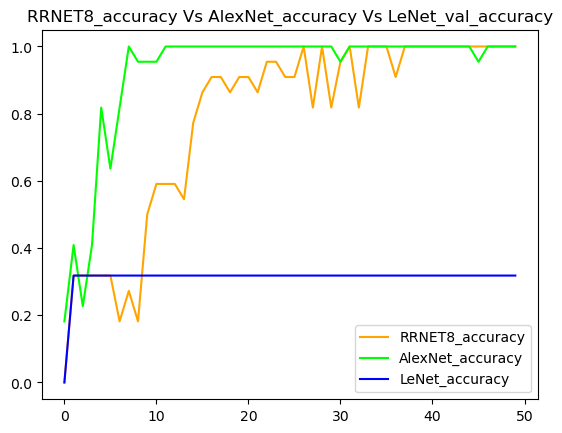

In [58]:
def plot_accuracy():
    plt.plot(comparison['RRNET8_accuracy'],color='orange',label = 'RRNET8_accuracy')
    
    plt.plot(comparison['AlexNet_accuracy'],color='lime',label = 'AlexNet_accuracy')
    
    plt.plot(comparison['LeNet_accuracy'],color='blue',label = 'LeNet_accuracy')
    
    
    plt.legend()
    plt.title('RRNET8_accuracy Vs AlexNet_accuracy Vs LeNet_val_accuracy')
    plt.show()

plot_accuracy()

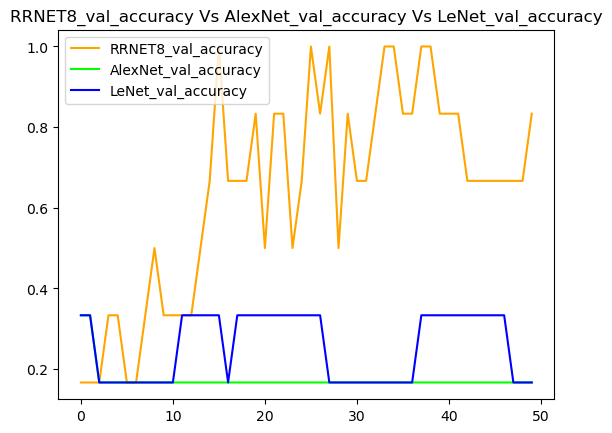

In [59]:
def plot_val_accuracy():
    plt.plot(comparison['RRNET8_val_accuracy'],color='orange',label = 'RRNET8_val_accuracy')
   
    plt.plot(comparison['AlexNet_val_accuracy'], color='lime' ,label = 'AlexNet_val_accuracy')
    
    plt.plot(comparison['LeNet_val_accuracy'],color='blue',label = 'LeNet_val_accuracy')
    
    plt.legend()
    plt.title('RRNET8_val_accuracy Vs AlexNet_val_accuracy Vs LeNet_val_accuracy')
    plt.show()

plot_val_accuracy()

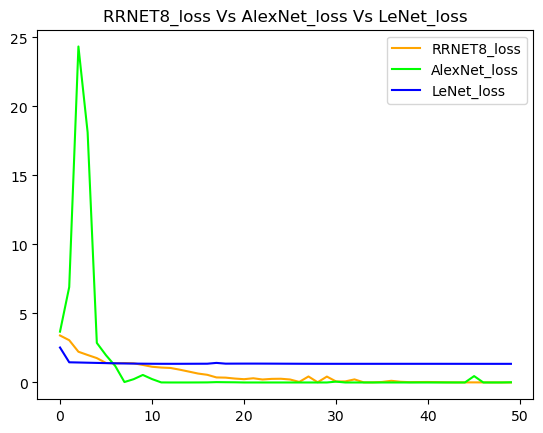

In [60]:
def plot_loss():
    plt.plot(comparison['RRNET8_loss'],color='orange',label = 'RRNET8_loss')
   
    plt.plot(comparison['AlexNet_loss'], color='lime' ,label = 'AlexNet_loss')
    
    plt.plot(comparison['LeNet_loss'],color='blue',label = 'LeNet_loss')
    
    plt.legend()
    plt.title('RRNET8_loss Vs AlexNet_loss Vs LeNet_loss')
    plt.show()
    
plot_loss()

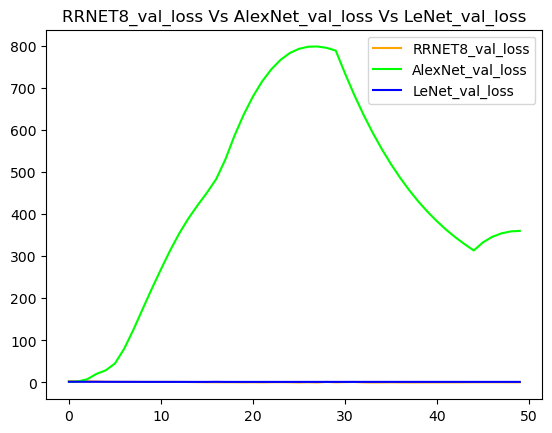

In [61]:
def plot_val_loss():
    plt.plot(comparison['RRNET8_val_loss'],color='orange',label = 'RRNET8_val_loss')
   
    plt.plot(comparison['AlexNet_val_loss'], color='lime' ,label = 'AlexNet_val_loss')
    
    plt.plot(comparison['LeNet_val_loss'],color='blue',label = 'LeNet_val_loss')
    
    plt.legend()
    plt.title('RRNET8_val_loss Vs AlexNet_val_loss Vs LeNet_val_loss')
    plt.show()
    
plot_val_loss()

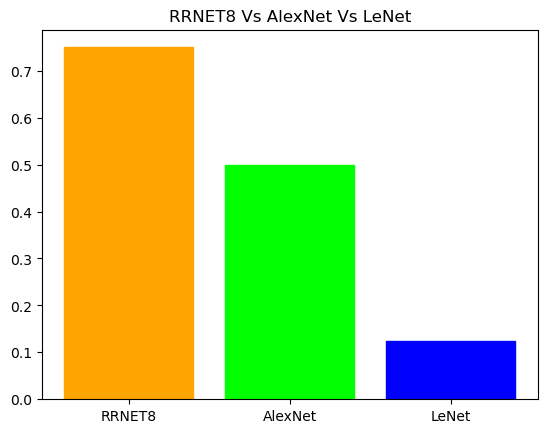

In [62]:
accuracy =[RRNET8_evaluate[1],AlexNet_evaluate[1], LeNet_evaluate[1]]
lable = ["RRNET8", "AlexNet" , "LeNet" ]

barlist = plt.bar(lable,accuracy)

barlist[0].set_color('orange')
barlist[1].set_color('lime')
barlist[2].set_color('blue')

plt.title("RRNET8 Vs AlexNet Vs LeNet")

plt.show()